In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df1 = pd.read_csv(r"D:\diabetes.csv")
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df1.shape

(768, 9)

In [ ]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

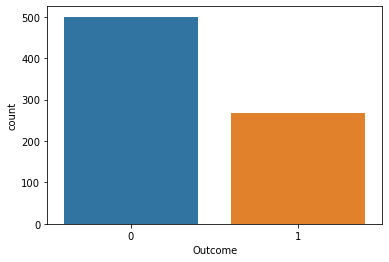

In [ ]:
sns.countplot(x='Outcome',data = df1)

In [ ]:
stats = df1.groupby('Outcome')['Outcome'].agg('count')
stats

Outcome
0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
x1=df1.drop('Outcome',axis = "columns")
x1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y1 = df1.Outcome
y1.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(
    x1,
    y1,
    test_size=0.3,
    random_state=0)

x1_train.shape, x1_test.shape

((537, 8), (231, 8))

In [ ]:
x1_train.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.133796,0.135395,-0.087961,-0.084711,-0.020281,-0.046851,0.534801
Glucose,0.133796,1.000000,0.152033,0.060085,0.333523,0.242622,0.125547,0.282401
BloodPressure,0.135395,0.152033,1.000000,0.204938,0.070660,0.284280,0.060239,0.220459
SkinThickness,-0.087961,0.060085,0.204938,1.000000,0.428738,0.415556,0.181830,-0.156725
Insulin,-0.084711,0.333523,0.070660,0.428738,1.000000,0.188615,0.192464,-0.062404
BMI,-0.020281,0.242622,0.284280,0.415556,0.188615,1.000000,0.153093,0.001750
DiabetesPedigreeFunction,-0.046851,0.125547,0.060239,0.181830,0.192464,0.153093,1.000000,0.042145
Age,0.534801,0.282401,0.220459,-0.156725,-0.062404,0.001750,0.042145,1.000000


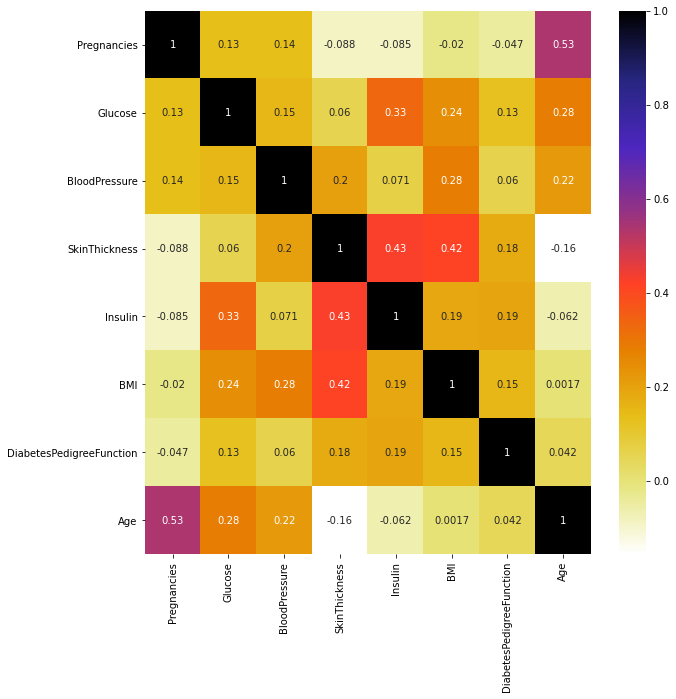

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(10,10))
cor = x1_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(x1_train, 0.4)
len(set(corr_features))

3

In [ ]:
corr_features

{'Age', 'BMI', 'Insulin'}

Text(0.5, 1.0, 'Glucose')

<Figure size 1152x432 with 0 Axes>

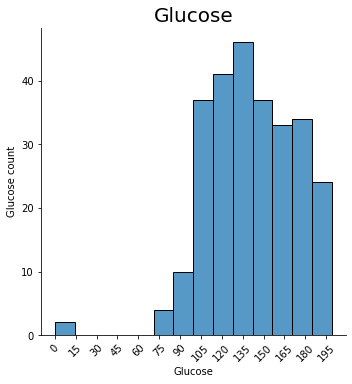

In [ ]:
#glucose for diabetic
fig = plt.figure(figsize =(16,6))

sns.displot(df1["Glucose"][df1["Outcome"] == 1])
plt.xticks([i for i in range(0,201,15)],rotation = 45)
plt.ylabel("Glucose count")
plt.title("Glucose",fontsize = 20)

Text(0.5, 1.0, 'Insulin')

<Figure size 1152x432 with 0 Axes>

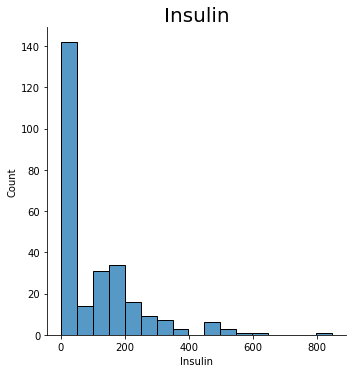

In [ ]:
#insulin for diabetic 

fig = plt.figure(figsize = (16,6))

sns.displot(df1["Insulin"][df1["Outcome"]==1])
plt.xticks()
plt.title("Insulin",fontsize = 20)

Text(0.5, 1.0, 'BMI')

<Figure size 1152x432 with 0 Axes>

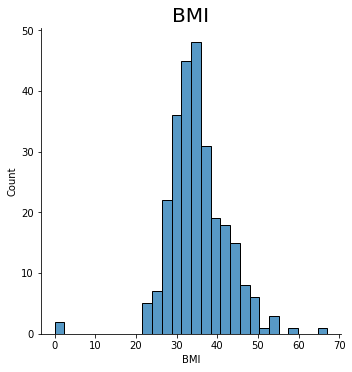

In [ ]:
#BMI for diabetic
fig = plt.figure(figsize =(16,6))

sns.displot(df1["BMI"][df1["Outcome"]==1])
plt.xticks()
plt.title("BMI",fontsize = 20)

Text(0.5, 1.0, 'diabetespedigreefunction')

<Figure size 2160x1440 with 0 Axes>

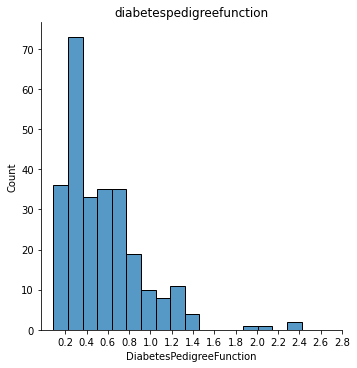

In [ ]:
#diabeticpedigreefunction for diabetic
fig = plt.figure(figsize = (30,20))
sns.displot(df1["DiabetesPedigreeFunction"][df1["Outcome"] == 1])
plt.xticks([i*0.2 for i in range(1,15)])
plt.title("diabetespedigreefunction")

Text(0.5, 1.0, 'BloodPressure')

<Figure size 1152x432 with 0 Axes>

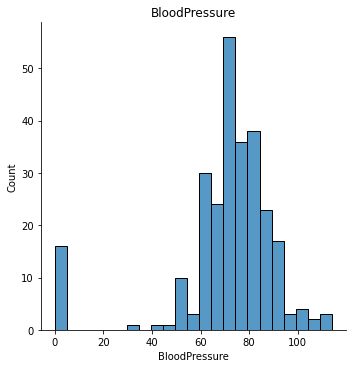

In [ ]:
fig = plt.figure(figsize =(16,6))

sns.displot(df1["BloodPressure"][df1["Outcome"] == 1])
plt.title("BloodPressure")

In [ ]:
# Removing the columns which are correlated
x2 = df1.drop(['Pregnancies','SkinThickness','Outcome'],axis = "columns")
y2 = df1.iloc[:,-1]
y2.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
x3 = x2.iloc[:,:].values
x3

array([[148.   ,  72.   ,   0.   ,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,   0.   ,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,   0.   ,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   , 112.   ,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,   0.   ,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,   0.   ,  30.4  ,   0.315,  23.   ]])

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split( x2, y2, test_size=0.3, random_state=0)

In [ ]:
x2_train.head(3)

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
580,151,90,0,42.1,0.371,21
418,83,68,0,18.2,0.624,27
764,122,70,0,36.8,0.340,27


In [ ]:
x2_test.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
661,199,76,0,42.9,1.394,22
122,107,74,100,33.6,0.404,23
113,76,62,0,34.0,0.391,25
14,166,72,175,25.8,0.587,51
529,111,65,0,24.6,0.660,31


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x2_train = sc.fit_transform(x2_train)
x2_test = sc.fit_transform(x2_test)
x4 = sc.fit_transform(x3)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x2_train,y2_train)
model.score(x2_test,y2_test)

0.255834768661379

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5 , test_size = 0.2 , random_state = 0)
cross_val_score(LinearRegression(),x4,y2,cv = cv)

array([0.28960467, 0.28414897, 0.29870731, 0.27379847, 0.22813688])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

def find_best_model_using_gridsearch(x,y):
    algos = {
        'linear_regression':{
            'model': LinearRegression(),
            'params':{
                'normalize': [True, False]
            }
        },
        'GaussianNB': {
            'model':GaussianNB(),
            'params': {
                'var_smoothing': np.logspace(0,-9, num=100)
            }
        },
        'svm': {
            'model':svm.SVC(gamma='auto'),
            'params': {
                'C':[1,10,20],
                'kernel':['rbf','linear']
            }
        },
        'lasso':{
            'model': Lasso(),
            'params':{
                'alpha' : [1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'], cv=cv, return_train_score=False)     # GridSearchCV is the main focus as it helps to try out the different parameters for the different models.
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])     # At last binding the results of the models with best params. into a DataFrame.    

In [ ]:
find_best_model_using_gridsearch(x4,y2)

,model,best_score,best_params
0,linear_regression,0.274879,{'normalize': True}
1,GaussianNB,0.763636,{'var_smoothing': 0.1873817422860384}
2,svm,0.787013,"{'C': 10, 'kernel': 'linear'}"
3,lasso,-0.013568,"{'alpha': 1, 'selection': 'random'}"
4,decision_tree,-0.290645,"{'criterion': 'mse', 'splitter': 'best'}"


In [ ]:
best_model = svm.SVC(C = 1.0, kernel='linear')

In [ ]:
best_model.fit(x2_train,y2_train)

SVC(kernel='linear')

In [ ]:
best_model.score(x2_test,y2_test)

0.7835497835497836

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_test, best_model.predict(x2_test))
cm

array([[140,  17],
       [ 33,  41]], dtype=int64)

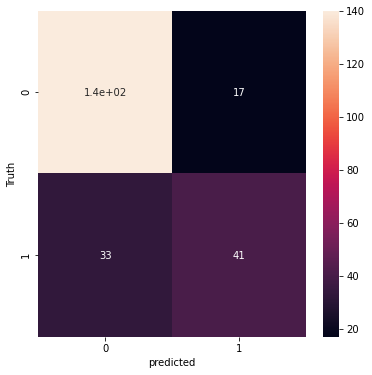

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
import pickle

In [ ]:
with open('best_model_pickle','wb') as f:
    pickle.dump(best_model,f)

In [ ]:
with open('best_model_pickle','rb') as f:
    bm = pickle.load(f)

In [ ]:
n = np.array([[148,66,0,26.6,0.351,50]]).reshape(1,-1)
n

array([[148.   ,  66.   ,   0.   ,  26.6  ,   0.351,  50.   ]])

In [ ]:
n_scale = sc.transform(n)
n_scale

array([[ 0.84832379, -0.16054575, -0.69289057, -0.68442195, -0.36506078,
         1.4259954 ]])

In [ ]:
bm.predict(n_scale)[0]

1